## Load the cleaned dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def load_data():
    df_train = pd.read_csv('dataset/cleaned_train.csv')
    df_test = pd.read_csv('dataset/test.csv', encoding = "ISO-8859-1")

    return df_train, df_test

In [4]:
df_train, df_test = load_data()

In [5]:
df_train.shape

(250305, 11)

In [6]:
df_train.isnull().sum()

ticket_id          0
city               0
agency_name        0
violation_code     0
disposition        0
fine_amount        0
judgment_amount    0
late_fee           0
admin_fee          0
discount_amount    0
compliance         0
dtype: int64

In [7]:
df_train.head()

,ticket_id,city,agency_name,violation_code,disposition,fine_amount,judgment_amount,late_fee,admin_fee,discount_amount,compliance
0,22056,4,1,1,1,250.0,305.0,25.0,20.0,0,0.0
1,27586,1,1,7,4,750.0,855.0,75.0,20.0,0,1.0
2,22062,1,1,1,2,250.0,0.0,0.0,0.0,0,0.0
3,22084,1,1,1,2,250.0,0.0,0.0,0.0,0,0.0
4,22093,1,1,1,2,250.0,0.0,0.0,0.0,0,0.0


In [8]:
X = df_train[df_train.columns[1:-1]]
y = df_train['compliance']

## Apply modelling algorithms

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.kernel_approximation import RBFSampler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, roc_curve, auc, plot_roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [11]:
X = df_train[df_train.columns[1:-1]]
y = df_train['compliance']

X_train, X_dev, y_train, y_dev = train_test_split(X, y, random_state=0, test_size=0.05)

### Feature scaling

In [12]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_dev_norm = scaler.transform(X_dev)

In [13]:
def modelFit(X_train, X_dev, y_train, y_dev, clf, cv=5):
    
    clf = clf.fit(X_train, y_train)
    
    cv = cross_val_score(clf, X_dev, y_dev, cv=cv, scoring = 'roc_auc')
    cv_mean = round(cv.mean(), 3)
    cv_std = round(cv.std(), 3)
    print('Cross-validation (AUC)', cv, ', mean =', cv_mean, ', std =', cv_std)
    
    #y_pred =clf.predict(X_dev)
    #confusion = confusion_matrix(y_dev, y_pred)
    #print(confusion)

    return cv_mean, cv_std

### 1). Naive Bayers Classifier

In [16]:
clf_NBayers = GaussianNB()

In [29]:
# Notice: scaling may or may not needed, depends
auc_mean_NBayers, auc_std_NBayers = modelFit(X_train_norm, X_dev_norm, y_train, y_dev, clf_NBayers, cv=20)

Cross-validation (AUC) [0.84513418 0.84711304 0.86302521 0.86101925 0.87319057 0.91761995
 0.82266197 0.89455137 0.84581187 0.86714557 0.82694497 0.81398753
 0.83754405 0.86665763 0.85323936 0.75985362 0.86893557 0.80728291
 0.84908222 0.85668513] , mean = 0.849 , std = 0.032


### 2). Logistic Regression

In [14]:
clf_LogReg = LogisticRegression()

In [23]:
# Notice: scaling is required
auc_mean_LogReg, auc_std_LogReg = modelFit(X_train_norm, X_dev_norm, y_train, y_dev, clf_LogReg, cv=20)

Cross-validation (AUC) [0.85700732 0.83670371 0.85619409 0.83797777 0.88658173 0.91642722
 0.85741393 0.91222554 0.85134183 0.89815668 0.83968555 0.85166712
 0.83895365 0.87912713 0.86587151 0.77546761 0.86591036 0.84644258
 0.88856305 0.88769415] , mean = 0.862 , std = 0.031


### 3). Random Forest

In [32]:
clf_RandForest = RandomForestClassifier(random_state=0)

In [33]:
# scaling doesn't really need it, advantage
auc_mean_RandForest, auc_std_RandForest = modelFit(X_train_norm, X_dev_norm, y_train, y_dev, clf_RandForest, cv=20)

Cross-validation (AUC) [0.79319599 0.85619409 0.89967471 0.80431011 0.86408241 0.88322038
 0.865492   0.87573868 0.81705069 0.89566278 0.86321496 0.84795337
 0.82680943 0.81512605 0.86131743 0.79278937 0.8689916  0.79042017
 0.83822092 0.87699576] , mean = 0.847 , std = 0.034


### 4). Gradient-boosted Decision Trees

In [34]:
clf_BDT = GradientBoostingClassifier(learning_rate=0.05, n_estimators=700)

In [35]:
# scaling doesn't really need it, advantage
auc_mean_BDT, auc_std_BDT = modelFit(X_train_norm, X_dev_norm, y_train, y_dev, clf_BDT, cv=20)

Cross-validation (AUC) [0.8540797  0.87530496 0.89745188 0.84068853 0.9003524  0.91621036
 0.87324478 0.88988886 0.84884793 0.91355381 0.86793169 0.86597994
 0.80691244 0.87907292 0.88370832 0.79742478 0.8947619  0.79260504
 0.86966439 0.88014554] , mean = 0.867 , std = 0.035


### 5). Stochastic Gradient Descent

In [37]:
clf_SGD = SGDClassifier(loss='hinge', penalty='l2', max_iter=100)

In [77]:
# scaling doesn't really need it, advantage
auc_mean_SGD, auc_std_SGD = modelFit(X_train_norm, X_dev_norm, y_train, y_dev, clf_SGD, cv=20)

Cross-validation (AUC) [0.85917593 0.83838439 0.83884522 0.84708593 0.8928707  0.83922472
 0.84315533 0.8725942  0.82640282 0.81916509 0.84909189 0.80490648
 0.85245324 0.75990783 0.84716725 0.80593657 0.83845938 0.82851541
 0.88019985 0.90746171] , mean = 0.843 , std = 0.032


### 6). XGBoost

In [41]:
clf_XGB = XGBClassifier()

In [42]:
# scaling doesn't really need it, advantage
auc_mean_XGB, auc_std_XGB = modelFit(X_train_norm, X_dev_norm, y_train, y_dev, clf_XGB, cv=20)

Cross-validation (AUC) [0.86210355 0.87731092 0.89707238 0.84773651 0.89747899 0.93404717
 0.86860938 0.90094877 0.86172404 0.92087287 0.85936568 0.85597723
 0.83822174 0.8750881  0.88075359 0.77823258 0.8864986  0.8262465
 0.89320626 0.87327577] , mean = 0.872 , std = 0.033


### Draw the ROC curves

In [84]:
def roCurves(clfList, X_dev, y_dev):
    
    roCurveList = []
    plt.subplots(1, 1, figsize=(8, 8))
    
    for clf in clfList:
        ax = plt.gca()
        roc = plot_roc_curve(clf, X_dev, y_dev, ax=ax, alpha=0.8)
        roCurveList.append(roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

    return roCurveList

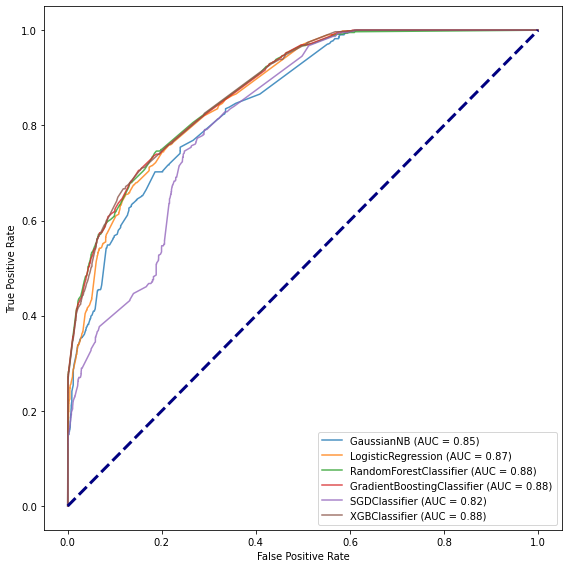

In [85]:
exps = [clf_NBayers, clf_LogReg, clf_RandForest, clf_BDT, clf_SGD, clf_XGB]

roCurves(exps, X_dev_norm, y_dev)

# Save the figure and show
plt.tight_layout()
plt.savefig('plots/ROCs.png')
plt.show()

### Summary plot with Cross-Validation

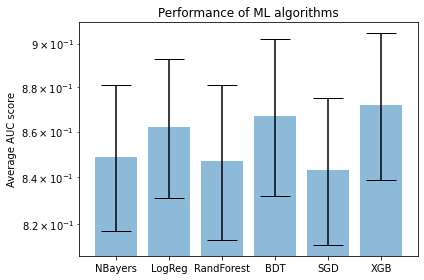

In [83]:
# Create lists for the plot
exps = ['NBayers', 'LogReg', 'RandForest', 'BDT', 'SGD', 'XGB']
x_pos = np.arange(len(exps))
CTEs = [auc_mean_NBayers,auc_mean_LogReg,auc_mean_RandForest,auc_mean_BDT,auc_mean_SGD,auc_mean_XGB]
error = [auc_std_NBayers,auc_std_LogReg ,auc_std_RandForest ,auc_std_BDT ,auc_std_SGD ,auc_std_XGB]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=15)
ax.set_ylabel('Average AUC score')
ax.set_xticks(x_pos)
ax.set_xticklabels(exps)
ax.set_title('Performance of ML algorithms')
ax.yaxis.grid(True)
ax.set_yscale('log')

# Save the figure and show
plt.tight_layout()
plt.savefig('plots/algorithmExp_cv.png')
plt.show()